# Project: Investigate a Dataset - IMDb ratings

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

IMDB stands for internet Movie Database. The database is an online database on related films, tv shows and other media such as streaming content and video game. The data is provided by volunteers. Users rate titles on a scale of 1 to 10 - totals are converted to weighted mean-rating.


### Question(s) for Analysis

Our primary questions is:

**What are the characteristics of movies that recieve higher average votes on IMdb?**
 
In order to answer our pimary questions, we will be assessing the following questions:

> Do movies with bigger budgets have better average votes?

> Do longer movies recieve higher average votes as opposed to shorter movies?

> What types of genre's have the highest average votes?



In [1]:
import pandas as pd #importing liabries
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
df = pd.read_csv('tmdb-movies.csv') #importing csv data to the dataframe

In [3]:
df.info() #assesing the types of data and count.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe() #summary statistics of the dataframe

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the statistics above, we see we may have a issue in our a analysis which includes the movie budgets or revenue. The median revenue and median budget are 0,meaning at least 50% of our movies have no budget or revenue. Although this is possible for revenue, it seems more likely that this could have been a capturing error where budget is involved. We shall limit our analysis to the analysis of movies with a budget of atleast $1.

In [5]:
df_2 = df.query('budget_adj > 1') #creating a copy dataframe with budget atleast above $1

In [6]:
df_2.describe() #describing summary statistics for the new dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5168.000000,5168.000000,5.168000e+03,5.168000e+03,5168.000000,5168.000000,5168.000000,5168.000000,5.168000e+03,5.168000e+03
mean,45463.587655,0.992572,3.075133e+07,8.030673e+07,107.098878,408.738003,6.032624,2001.248452,3.690201e+07,1.022152e+08
std,72659.166661,1.329337,3.890348e+07,1.594979e+08,22.811351,788.367564,0.883859,11.776095,4.195885e+07,1.959331e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,1.012787e+00,0.000000e+00
25%,8839.750000,0.348157,6.000000e+06,0.000000e+00,93.000000,35.750000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,13004.500000,0.624462,1.700000e+07,2.100537e+07,103.000000,122.000000,6.100000,2005.000000,2.273559e+07,2.864807e+07
75%,44900.000000,1.152547,4.000000e+07,8.947251e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134267e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.head(2) #assessing the first two rows of the data.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


The data has 21 columns as follows:

1.  The movie id
2.  The Imdb id for the movie
3.  The popularity of the movie as a float.
4.  The budget of the movie which is an integer.
5.  The revenue of the movie which is an integer.
6.  The original titile of the move which is a string.
7.  The movies cast.
8.  The homepage which is the official website of the movie which is a string.
9.  The director of the movie
10. The movie tagline
11. The movies keywords.
12. A short overview of the movie. 
13. The movies run time (length).
14. The movies genres
15. The production company
16. The movies release date
17. The number of votes the movie has garnered on the database.
18. The average vote that the movie has recieved.
19. The year the movie was released 
20. The adjusted budget, which is the budget adjusted for inflation.
21. The adjusted revenue, which is the revenue adjusted for inflation.


*From the analysis above the following was noted:*

The release date is showing displaying as a string, if we are to use dates in our analysis we would need to convert the type to datetime.

*The following columns could be dropped in our analysis*

- The id columns, as we can use the movie name as an identifier.
- The movie tagline can be dropped, as we do not need this column for our analysis.
- The movies keywords can be dropped.
- The budget can be dropped as the adjusted budget will be a better indicator of cost as older movies have been adjusted for inflation.
- The revenue can be dropped as we can use the adjusted revenue. This will be a better indicator of the movies revenue as the older mvovies will show and accurate revenue.



### Data Cleaning
 

In [8]:
df.isnull().sum() #summing all null values in the dataframe

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the information above we can see that there is no missing values on the data relating to the questions except for genre which has 23 missing values. The other missing values will not affect our analysis.

In [9]:
df.nunique() #assesing the number of unique values in each column of the dataframe

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
df.loc[df.duplicated(), :] #Showing all duplicated rows in the dataframe.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


The dataset has one duplicated row for the movie 'Tekken'.

In [11]:
df_2.loc[df_2.duplicated(),:] #showing duplicate rows in the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
df.drop_duplicates(inplace=True) #dropping duplicate rows in the dataset

In [13]:
df_2.drop_duplicates(inplace=True) #dropping duplicate rows in the dataset

C:\Users\tlotl\anaconda3\envs\my_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df.loc[df.duplicated(), :] #Assessing if duplicates have been dropped.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [15]:
df_2.loc[df.duplicated(), :] #Assessing if duplicates have been dropped.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


As per the output above, no more duplicates exist in our data. We shall proceed in cleaning the data for specific quesitons posed.

In [16]:
df_budget = df_2.filter(['original_title','vote_average','budget_adj'],axis=1) #filtering for columns to be used in the analysis
df_budget.sample(10) #assessing a sample of the data.

,original_title,vote_average,budget_adj
6681,The Guardian,7.0,7.571684e+07
7954,Rhinestone,5.3,5.877318e+07
2543,Wing Commander,4.1,3.927159e+07
1943,The Social Network,7.1,4.000000e+07
8239,Le Bonheur est dans le prÃ©,7.2,1.912487e+07
4252,Guarding Tess,5.6,2.942223e+07
6293,Wolf Creek,5.8,1.116563e+06
9215,Lock Up,6.1,4.221564e+07
5521,Turbo,6.1,1.263645e+08
8991,Deep Impact,5.6,1.003272e+08


In [17]:
df_genre = df #creating a seperate pandas dataframe to analyse genres.

In [18]:
df_genre.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [19]:
df_genre.genres = df_genre.genres.str.split("|") #Splitting genres into a list.

In [20]:
df_genre = df_genre.explode("genres") #splitting different genres in the same movie to different rows.

In [21]:
df_genre = df_genre.dropna(subset=['genres']) #dropping null values in the genre column

In [22]:
df_genre.isnull().sum() #assessing that null values in genre column have been dropped.

id                          0
imdb_id                    23
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                      124
homepage                19805
director                   91
tagline                  6376
keywords                 3321
overview                    5
runtime                     0
genres                      0
production_companies     2198
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
dtype: int64

In [23]:
df_genre.shape #assessing rows and columns in the genre dataset.

(26955, 21)

A seperate copy of the dataframe has been created to analyse the first question on whether the budget impacts on the vote average. For this we have filtered the Original Title, The Vote Average and the adjusted budget as the other columns are not necessary to answer this question.

From the data above the budget and vote average have no missing values and we can use the data as it is for the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Do movies with bigger budgets have better average votes?

In [24]:
df_budget.corr() #assessing correlation between vote average 

,vote_average,budget_adj
vote_average,1.000000,0.111789
budget_adj,0.111789,1.000000


From the correlation matrix above, there is no correlation between the size of the movie budgets and the average vote. We will continue our analysis using a scatter plot to confirm this relationship.

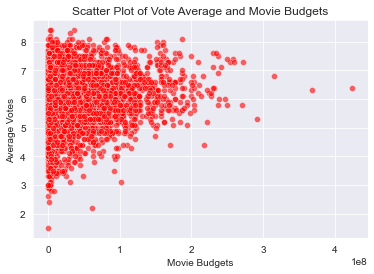

In [25]:
budg = sns.scatterplot(data=df_budget, x="budget_adj", y="vote_average",color='red',alpha=0.6); #scatter plot of vote average and movie budgets.
budg.set (xlabel='Movie Budgets',
          ylabel='Average Votes',
          title='Scatter Plot of Vote Average and Movie Budgets');

From the scatter plot above we can see that there is no clear relationship between movie budgets and average vote recieved on IMdb.

In [26]:
df_budget.describe() #summary statistics of vote average and movie budgets.

,vote_average,budget_adj
count,5167.000000,5.167000e+03
mean,6.032824,3.690335e+07
std,0.883828,4.196280e+07
min,1.500000,1.012787e+00
25%,5.500000,8.102293e+06
50%,6.100000,2.273036e+07
75%,6.600000,5.008384e+07
max,8.400000,4.250000e+08


In [27]:
median = df_budget['budget_adj'].median()
low_budget = df_budget.query('budget_adj < {}'.format(median))
high_budget = df_budget.query('budget_adj >= {}'.format(median))

mean_low_budget = low_budget['vote_average'].mean()
mean_high_budget = high_budget['vote_average'].mean()

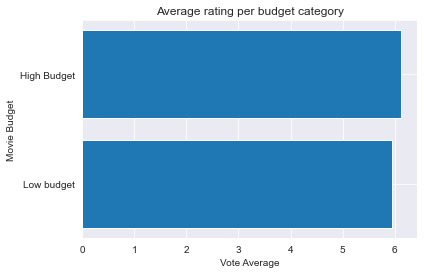

In [28]:
locations = [1,2]
heights = [mean_low_budget, mean_high_budget]
labels = ['Low budget','High Budget']
plt.barh(locations, heights, tick_label = labels)
plt.title('Average rating per budget category')
plt.xlabel('Vote Average')
plt.ylabel('Movie Budget');

From our analysis of movie budgets it is clear that the movie budget does not impact the rating of the movie.


### How does the length of a movie impact the vote average?

We will be delving into summary stastictics and visualisations to answer the question above, see the analysis of this question below

In [29]:
vote_analysis = ['runtime','vote_average']
corr = df[vote_analysis].corr()

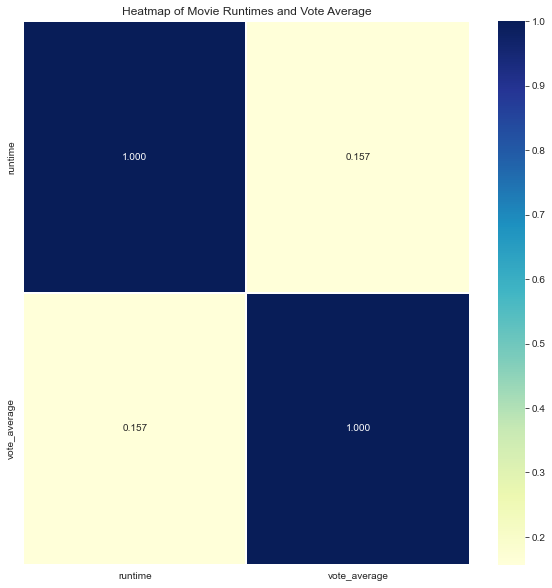

In [30]:
plt.figure(figsize=(10,10))
run = sns.heatmap(corr, annot=True, fmt='.3f',cmap="YlGnBu",linewidths=2)

run.set(title='Heatmap of Movie Runtimes and Vote Average')

plt.show()

From the heatmap above it is clear to see that a strong relationship between runtime and vote average does not exist, the length of the movies does not affect the vote average. 

### Which genres have the highest average vote?

In [31]:
df_genre = df_genre.filter(['genres','vote_average']) #filtering the dataframe into genre and vote average.

In [32]:
df_genre.describe() #looking at summary statistics for vote average

,vote_average
count,26955.000000
mean,5.956535
std,0.911927
min,1.500000
25%,5.400000
50%,6.000000
75%,6.600000
max,9.200000


In [33]:
df_genre.groupby('genres').mean() #Grouping data by the genres, and getting the averge vote for each genre.

,vote_average
genres,
Action,5.787752
Adventure,5.940585
Animation,6.403147
Comedy,5.905167
Crime,6.124889
Documentary,6.908462
Drama,6.165546
Family,5.997563
Fantasy,5.863537


In [34]:
df_genre_graph = df_genre.groupby('genres').mean() #grouping vote averages by genres.

In [35]:
gen_count = df_genre.groupby('genres').count() #count of vote average by genre

In [37]:
def bar_grph(feature_name,x_axis,y_axis,clor,ttle):
    grph = feature_name.plot(kind='bar', color = clor, figsize=(20,5))
    grph.set(title=ttle, 
       xlabel =x_axis,
       ylabel= y_axis);
    #function to plot bar graphs

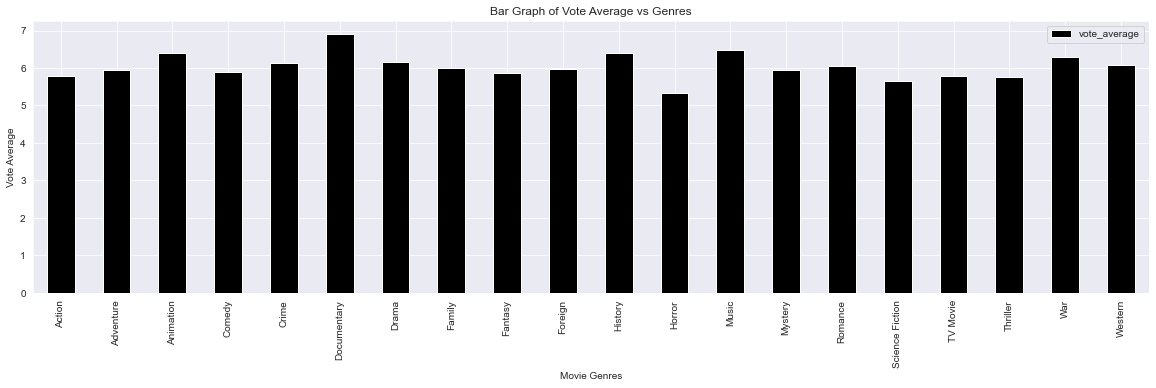

In [38]:
bar_grph(df_genre_graph, 'Movie Genres', 'Vote Average' , 'black' , 'Bar Graph of Vote Average vs Genres') #plotting bar graph

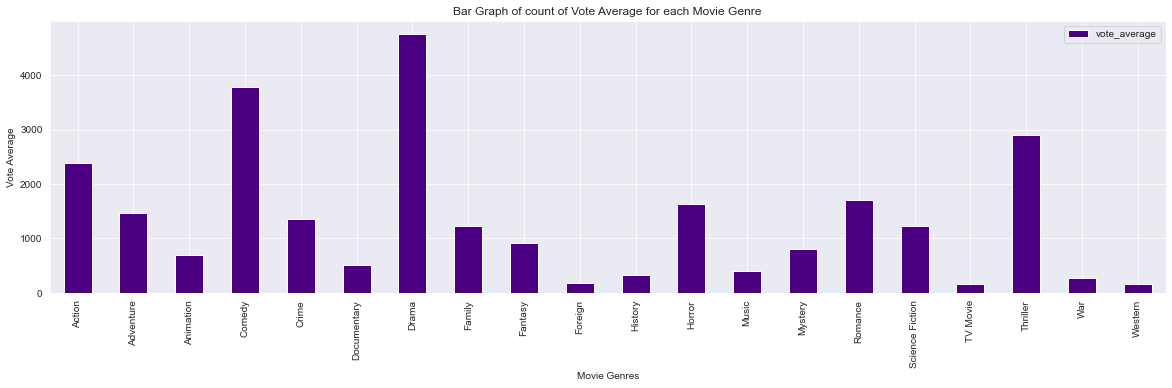

In [39]:
bar_grph(gen_count, 'Movie Genres', 'Vote Average' , 'indigo' , 'Bar Graph of count of Vote Average for each Movie Genre') #plotting bar graph

From the bar graphs above it is clear to see the top rated movie genres on ImDB are Documentaries, History, Musicals and War movies. From our assessment above it is also clear to see that these movie genres listed as the top rated movie genres do not make a significant portion of the population of movies on the database, with Drama movies being the most rated movies on the database and comedy coming second.


<a id='conclusions'></a>
## Conclusions:
From the analysis above we assessed three factors that affect vote average of IMdb, the following insights were drawn from the analysis:

1. The budget of the movie does not affect the vote average, with low budget and high budget movies getting around the same average vote average.
2. The runtime does not affect the vote average.
3. The highest rated genres on Imdb are Documentaries, History, Musicals and war movies.

Limitations:

The analysis of the budget dataset resulted in atleast half of the dataset being dropped, this could be from incorerct data entry as half of the movies had a budget of less than zero.

## Sources

Sources used in this analysis:

https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

https://indianaiproduction.com/seaborn-scatter-plot/

https://indianaiproduction.com/seaborn-heatmap/

https://en.wikipedia.org/wiki/IMDb

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])